# Exercise 4: Fourier Transform Analysis

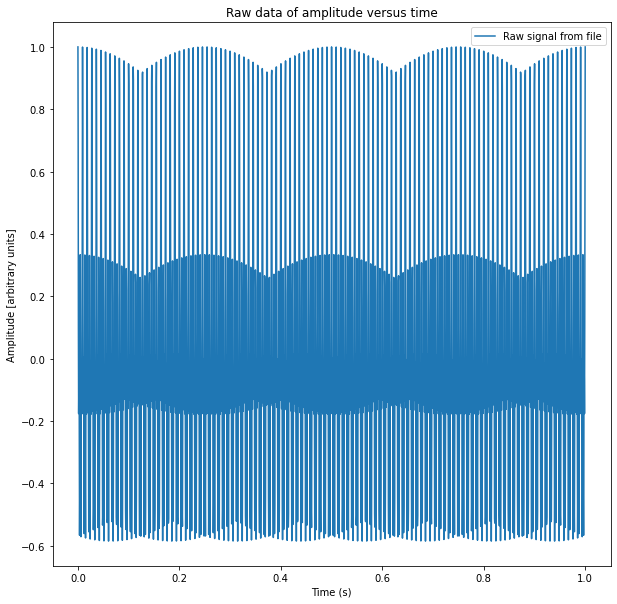

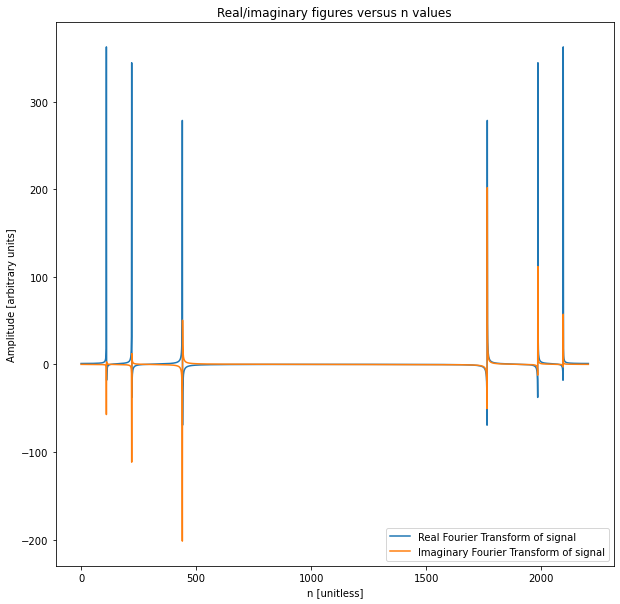

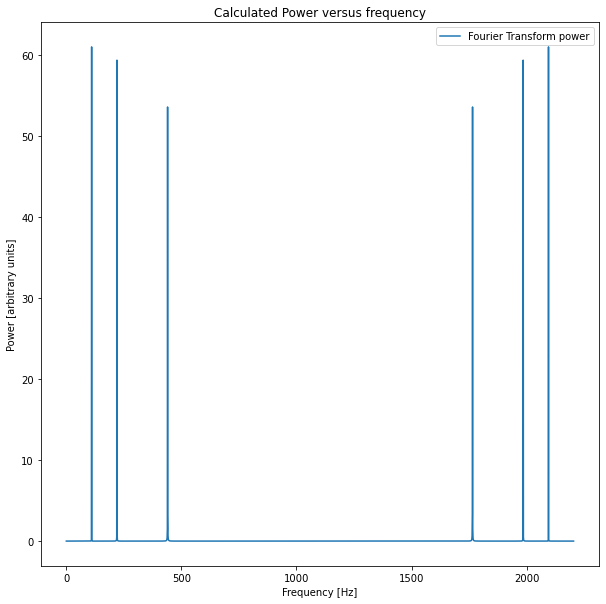

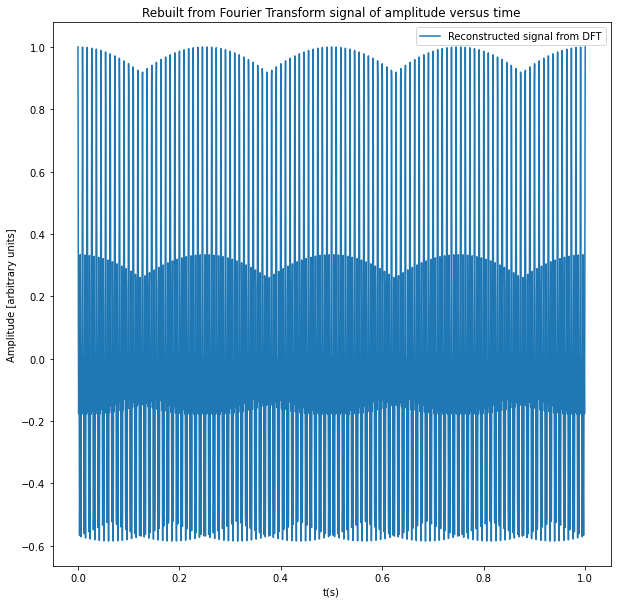

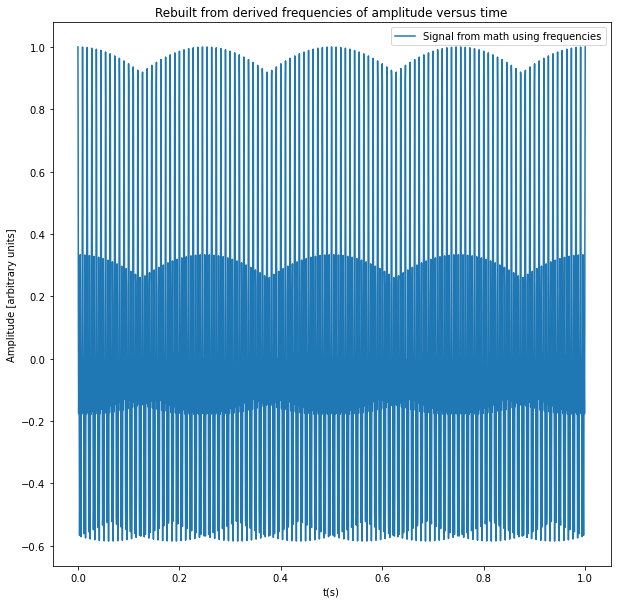

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import cos, pi, sin
import pandas as pd
# CONSTANTS ========================================================================

file = "superposition_signal.txt"

# FUNCTIONS ========================================================================

def signal(f1, f2, f3, t):
    '''Original signal as a mathematical function, returns amplitude of signal at time
    Keyword Arguments:
        f1 -- first frequency of signal as float
        f2 -- second frequency of signal as float
        f3 -- third frequency of signal as float
        t  -- time as either numpy array for as float
    returns:
        float/np.array -- amplitude of signal at given time
    '''
    return (1/3)*(cos(2*pi*f1*t)+cos(2*pi*f2*t)+cos(2*pi*f3*t))

def real_fourier_transform(signal):
    '''computes the discrete real Fourier transform of an inputted signal
    
    Keyword Arguments:
        signal  -- signal from data as numpy array
    returns:
        np.array -- real fourier transform as 1d numpy array
    '''
    #algorithm from https://www.ritchievink.com/blog/2017/04/23/understanding-the-fourier-transform-by-example/
    N = signal.size             #Samples
    n = np.arange(N)            #all our n's, x-values
    m = n.reshape((N, 1))       #all our m's, y-values
    # ^ these two multiplied make an NxN matrix of all m's an n's to N-1
    real = cos((2*pi*m*n)/N) #matrix of real
    return np.dot(real, signal) # dot product returns us to 1d numpy array

def imaginary_fourier_transform(signal):
    '''computes the discrete imaginary Fourier transform of an inputted signal
    
    Keyword Arguments:
        signal  -- signal from data as numpy array
    returns:
        np.array -- imaginary fourier transform as 1d numpy array
    '''
    N = signal.size             #Samples
    n = np.arange(N)            #all our n's, x-values
    m = n.reshape((N, 1))       #all our m's, y-values
    # ^ these two multiplied make an NxN matrix of all m's an n's to N-1
    imag = sin((2*pi*m*n)/N) #matrix of imaginary
    return np.dot(imag, signal) # dot product returns us to 1d numpy array

def inverse_fourier_transform(real, imag):
    '''
    reverses the Fourier Transform and returns the reconstructed signal. Used for error testing.
    
    Keyword Arguments:
        real -- real fourier transform numpy array
        imag -- imaginary fourier transform numpy array
    returns:
        np.array -- reconstructed signal from real and imaginary portions of DFT
    '''
    N = real.size # no undersampling allowed
    n = np.arange(N) #horizontal vector
    m = n.reshape((N, 1)) # vertical vector
    rec_real = np.dot(real, cos((2*pi*m*n)/N)) #real vector
    rec_imag = np.dot(imag, sin((2*pi*m*n)/N)) #imaginary vector
    return (rec_real+rec_imag)/N


# MAGIC     ========================================================================

time = np.array([]) #Need numpy for speed reasons
amplitude = np.array([])
# FILE GET
with open(file, 'r') as f: #with closes the file for us
    # ^ Pythonic
    for line in f:
        cols = line.split() #separate on spaces
        time = np.append(time, float(cols[0])) #two lists, both floats
        amplitude = np.append(amplitude, float(cols[1]))

N = time.size
n = np.arange(N)    #just need this for plotting.
h = time[1]-time[0] # time interval
freq = np.linspace(0, 1/h, N) #freq spectrum

#All the calculated numpy arrays
real          = real_fourier_transform(amplitude) #Dominant over Imaginary
imag          = imaginary_fourier_transform(amplitude) 
power         = real**2+imag**2
power_norm    = power/N
reconstructed = inverse_fourier_transform(real, imag)

# df = pd.DataFrame({"time": time, "frequency": freq, "power": power_norm}) #So I can visually determine the frequencies
# df.to_excel('frequencies.xlsx') #was having trouble getting it from graphs
f1 = 110 #hz
f2 = 220 #hz
f3 = 440 #hz

signal_from_math = signal(f1, f2, f3, time) #For confirming frequencies

# RESULTS  ========================================================================
# I know there's a better way, but I don't want to fuss with this right now
#plotting of original signal
fig, ax = plt.subplots(figsize=(10, 10)) 
ax.plot(time, amplitude, label='Raw signal from file')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude [arbitrary units]')
ax.set_title('Raw data of amplitude versus time')
ax.legend()
# Plotting of real/imaginary
fig2, ax2 = plt.subplots(figsize=(10, 10))
ax2.plot(n, real, label='Real Fourier Transform of signal')
ax2.plot(n, imag, label='Imaginary Fourier Transform of signal')
ax2.set_xlabel('n [unitless]')
ax2.set_ylabel('Amplitude [arbitrary units]')
ax2.set_title('Real/imaginary figures versus n values')
ax2.legend()
# Plotting of Power Spectrum
fig3, ax3 = plt.subplots(figsize=(10, 10))
ax3.plot(freq, power*(1/N), label='Fourier Transform power')
ax3.set_xlabel('Frequency [Hz]')
ax3.set_ylabel('Power [arbitrary units]')
ax3.set_title('Calculated Power versus frequency')
ax3.legend()
# # plotting of rebuilt signal -> This was for testing
fig4, ax4 = plt.subplots(figsize=(10, 10))
ax4.plot(time, reconstructed, label='Reconstructed signal from DFT')
ax4.set_xlabel('t(s)')
ax4.set_ylabel('Amplitude [arbitrary units]')
ax4.set_title('Rebuilt from Fourier Transform signal of amplitude versus time')
ax4.legend()
# # Test frequencies -> This was for testing as well
fig5, ax5 = plt.subplots(figsize=(10, 10))
ax5.plot(time, signal_from_math, label='Signal from math using frequencies')
ax5.set_xlabel('t(s)')
ax5.set_ylabel('Amplitude [arbitrary units]')
ax5.set_title('Rebuilt from derived frequencies of amplitude versus time')
ax5.legend()



# RESULTS
As we can see in the Imaginary/Real graph, there is a clear dominance with real numbers of imaginary numbers when it comes to the provided signal. (As seen by the bigness of the real compared to imaginary).
It was found that the three frequencies were 

f1 = 110 Hz,

f2 = 220 Hz,

f3 = 440 Hz

which was then confirmed by rebuilding the initial graphs with the Amplitude equation provided.


 